## 3.1. 지도 학습 (분류 / 회귀)
* 정답 (레이블 label)을 컴퓨터에 미리 알려주고 데이터를 학습시키는 방법
* 분류 (Classification): 주어진 데이터를 정해진 범주에 따라 분류 (ex: 스팸 메일 필터링)
* 회귀 (Regression): 데이터들의 특성(feature)을 기준으로 연속된 값을 그래프로 표현하여 패턴이나 트렌드 예측 (ex. 주가 분석 예측)

##### 3.1.1. KNN (K-nearest neighbor; K-최근접 이웃)

In [3]:
# KNN
# 새로운 입력을 받았을 때 기존 클러스터에서 모든 데이터와 instance 기반 거리를 측정한 후 가장 많은 속성을 가진 클러스터에 할당하는 '분류' 알고리즘
# 과거 데이터를 저장해두고 필요할 때마다 비교를 수행하는 방식
# K 값의 선택에 따라 새로운 데이터에 대한 분류 결과가 달라질 수 있음

# (코드 3-1) 라이브러리 호출 및 데이터 준비
import numpy as nb # 벡터 및 행렬 연산 처리를 위한 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics # '모델 성능 평가'를 위함

# 데이터 셋에 컬럼 이름 할당
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv("./data/iris.data", names=column_names)

In [5]:
# 한 번 데이터 확인
dataset.head(2)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [13]:
# (코드 3-2) 훈련과 테스트 데이터셋 분리
X = dataset.iloc[:, :-1].values # 모든 행, 마지막(Class)을 제외한 열
y = dataset.iloc[:, 4].values # 모든 행, 마지막 열(Class)

# X, y를 사용하여 훈련, 테스트 데이터 셋 분리
# 테스트 데이터셋의 비율은 20%만 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling 스케일링 작업을 통해 모든 특성의 범위(분포)를 같게 만들어줌!!
# https://junklee.tistory.com/18
# https://for-my-wealthy-life.tistory.com/18
from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링(Scaling): 표준=0, 표준편차=1이 되도록 변환
X_train = s.fit_transform(X_train) # train data 스케일링 처리
X_test = s.fit_transform(X_test) # test data 스케일링 처리

In [14]:
# (코드 3-3) 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # K=50인 K-최근접 이웃 모델 생성
knn.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier(n_neighbors=50)

In [15]:
# (코드 3-4) 모델 정확도
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test) # y_pred는 y-hat을 의미!
print(f"정확도 {accuracy_score(y_test, y_pred)}")

# 결과 해석
# K=50일 때 예측 값이 93%로 수치가 높음

정확도 0.9


In [23]:
# (코드 3-5) 최적의 K 찾기
# for문을 이용하여 K값을 1~10까지 순환하면서 최적의 k값과 정확도 찾기
import numpy as np
k = 10
acc_array = np.zeros(k) # [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]임
for k in np.arange(1, k+1, 1) : # k는 1~10까지의 값 취함
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array) # acc_array 중에서의 최댓값
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print(f"최대 정확도는 {max_acc}로, 이 때의 k값은 {k+1}")
print(f"k가 1~10에서의 각각의 정확도 리스트: {acc_list}")

최대 정확도는 0.9666666666666667로, 이 때의 k값은 1
k가 1~10에서의 각각의 정확도 리스트: [0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9333333333333333]


##### 3.1.2. SVM(Support Vector Machine; 서포트 벡터 머신)

In [25]:
!pip install tensorflow
# 이랬는데도 아래 tensorflow가 없다고 되어 있어서 Anaconda Prompt에서 conda install tensorflow 해줌

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [27]:
# SVM
# 커널을 적절히 선택한다면 정확도가 좋기 때문에 정확도를 요구하는 '분류' 문제를 다룰 때 사용하면 좋음 (텍스트 분류에서도 많이 사용)
# '분류'를 위한 '기준선'을 정의하는 모델
# 분류되지 않은 새로운 데이터가 나타나면 결정 경계(기준선)를 기준으로 경계의 어느 쪽에 속하는지 분류하는 모델

# (코드 3-6) 라이브러리 호출
from sklearn import svm, metrics, datasets, model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [31]:
# (코드 3-7) iris data를 통해 훈련/테스트 데이터셋 분리
iris = datasets.load_iris() # 사이킷런에서 제공하는 iris 데이터 호출
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)
# 테스트 데이터셋의 비율은 60% 사용
# 사이킷런의 model_selection 패키지에서 제공하는 train_test_split 메서드를 통해 훈련/테스트 데이터셋 분리

In [32]:
# (코드 3-8) SVM 모델에 대한 정확도
# C: 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도 결정
# gamma: 데이터 샘플이 영향력을 행사하는 거리를 결정 (결정 경계의 곡률 결정)
# gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아짐
# C, gamma >> 너무 작으면 과소적합, 너무 높으면 과대적합(& 알고리즘 복잡도 증가) 위험
# C (cost)가 커질수록 이상치의 존재 가능성을 낮게 봄

# https://bskyvision.com/entry/%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0SVM%EC%9D%98-%EC%82%AC%EC%9A%A9%EC%9E%90%EB%A1%9C%EC%84%9C-%EA%BC%AD-%EC%95%8C%EC%95%84%EC%95%BC%ED%95%A0-%EA%B2%83%EB%93%A4-%EB%A7%A4%EA%B0%9C%EB%B3%80%EC%88%98-C%EC%99%80-gamma

svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) # C=1, 즉 어느 정도의 이상치를 인정하고 무난하게 결정 경계를 찾음

# 훈련 데이터를 사용하여 SVM 분류기 훈련
svm.fit(X_train, y_train)

# 훈련된 모델을 사용하여 test data에서 예측
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print(f"정확도: {score}")

정확도: 0.9888888888888889


##### 3.1.3. Decision Tree (결정 트리)

In [50]:
# 결정 트리
# 주어진 데이터를 분류하거나 결괏값을 예측하는 분석 방법
# '이상치'가 많은 값으로 구성된 data set을 다룰 때 사용하면 좋음
# 결과 과정이 시각적으로 표현되므로, 머신 러닝이 어떤 방식으로 의사 결정을 하는지 알고 싶을 때 유용

# (코드 3-9) 라이브러리 호출 및 데이터 준비
import pandas as pd

# train.csv를 df에 저장
df = pd.read_csv("./data/titanic/train.csv", index_col="PassengerId")

# 상위 3개만 확인
pd.DataFrame(df).head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [51]:
# (코드 3-10) 데이터 전처리
# 승객의 생존 여부를 예측하기 위해 아래 지정한 칼럼들만 사용
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male':0, 'female':1}) # 성별을 나타내는 Sex를 0 또는 1의 정수 값으로 변환

# 결측치 제거
df = df.dropna()
X = df.drop("Survived",axis=1) # X는 Survived 칼럼을 제외한 모든 데이터
y = df['Survived'] # Survived 칼럼을 예측 레이블로 사용
pd.DataFrame(X)

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250
887,2,0,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000


In [52]:
# (코드 3-11) 훈련과 테스트 데이터셋으로 분리
# random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값 (이유: train_test_split()은 랜덤으로 데이터를 분리하므로 random_state를 설정하지 않으면 수행할 때마다 다른 학습/테스트 데이터 세트가 생성됨)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
# (코드 3-12) 결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [54]:
# (코드 3-13) 모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# (코드 3-14) 모델 예측
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 테스트 데이터에 대한 예측 결과 보여줌

# 결과 해석
# 약 83%로 높은 수치 보임 >> 즉, 학습이 잘 됨

0.8268156424581006

In [56]:
# (코드 3-15) 혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival(생존X 예상)', 'Predicted Survival(생존O 예상)'],
    index = ['True Not Survival(실제로 생존X)', 'Trued Survival(실제로 생존O)']
)

,Predicted Not Survival(생존X 예상),Predicted Survival(생존O 예상)
True Not Survival(실제로 생존X),97,15
Trued Survival(실제로 생존O),16,51


##### 3.1.4. Logistic Regression (로지스틱 회귀 & 선형 회귀)

In [57]:
# 로지스틱 회귀
# 분석하고자 하는 대상들이 두 집단 혹은 그 이상의 집단으로 나누어진 경우, 개별 관측치들이 어느 집단으로 분류될 수 있는지 분석하고 이를 예측하는 모형을 개발하는 데 사용되는 통계 기법
# 목표: 신규 데이터 (숫자 digit)에 대한 정확한 예측

# (코드 3-16) 라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits() # 숫자 데이터 셋(digits)은 사이킷런에서 제공

# digits 데이터 셋의 형태 (이미지가 1797개 있고, 8x8 이미지의 64차원을 가짐)
print("Image Data Shape", digits.data.shape)

# 레이블(이미지의 숫자 정보) 이미지 1797개 있음
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


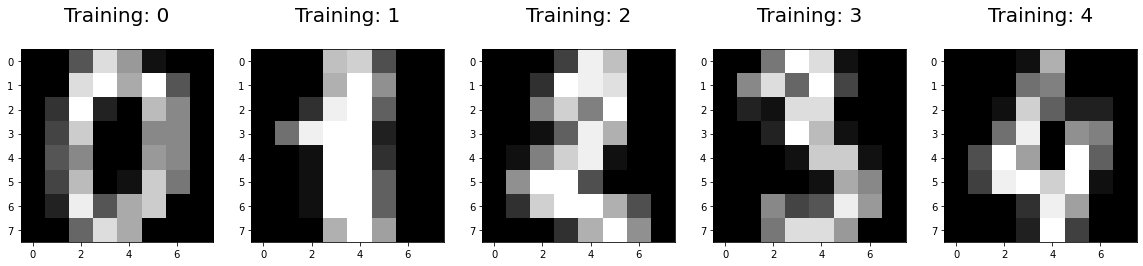

In [58]:
# (코드 3-17) digits 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

# 예시로 이미지 다섯 개만 확인
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}\n", fontsize=20)

In [59]:
# (코드 3-18) 훈련과 테스트 데이터셋 분리 및 로지스틱 회귀 모델 생성
# 훈련/테스트 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# 로지스틱 회귀 모델 생성
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 로지스틱 회귀 모델의 인스턴스 생성
logisticRegr.fit(X_train, y_train) # 모델 훈련

c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# (코드 3-19) 일부 데이터를 사용한 모델 예측
# 새로운 이미지(test data)에 대한 예측 결과를 넘파이 배열로 출력
logisticRegr.predict(X_test[0].reshape(1, -1))
# 이미지 10개에 대한 예측 한 번에 배열로 출력
logisticRegr.predict(X_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [62]:
# (코드 3-20) 전체 데이터를 사용한 모델 예측
predictions = logisticRegr.predict(X_test) # 전체 data set에 대한 예측
score = logisticRegr.score(X_test, y_test) # score 메서드를 통한 성능 측정
print(score)

# 결과 해석
# 95%로 나쁘지 않음
# 결과를 좀 더 명확하게 확인해보기 위해 혼동 행렬로 표현

0.9511111111111111


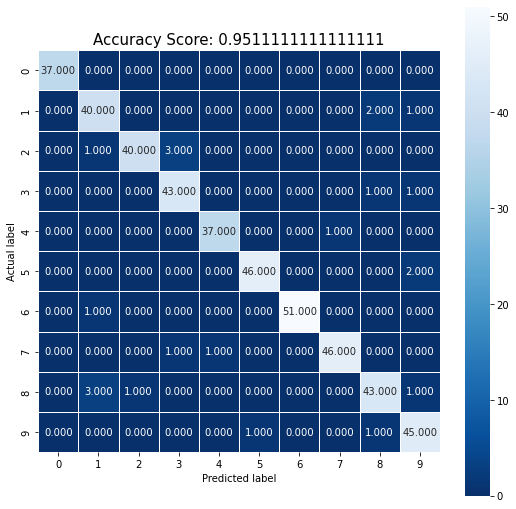

In [65]:
# (코드 3-21) 혼동 행렬 시각화
# 혼동 행렬: 지도 학습에서 test data set에 대한 분류 모델 성능을 설명하는 데 자주 사용됨
# 혼동 행렬을 표현하기 위한 패키지 'Seaborn' 사용
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions) # 혼동 행렬 (confusion_matrix)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15);
plt.show();

# 혼동 행렬: 결과 확인용으로만 사용 (직관적으로 이해하기에 난해하기 때문)

In [66]:
# 선형 회귀 분석 Linear Regression
# 독립 변수 x를 사용하여 종속 변수 y의 움직임 예측 및 설명
# 날씨 데이터셋 사용 >> 최대 온도를 예측할 것 (MinTemp, MaxTemp 정보만 사용)

# (코드 3-22) 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [67]:
# (코드 3-23) 날씨 데이터셋 불러오기
dataset = pd.read_csv("./data/weather.csv")

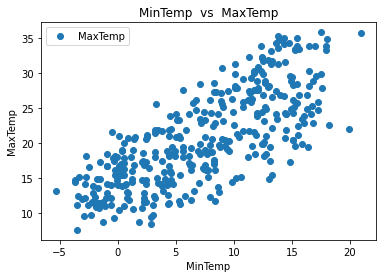

In [68]:
# (코드 3-24) 데이터 간 관계를 시각화로 표현
# MinTemp 와 MaxTemp 데이터 간의 분포를 확인하기 위해 2D 그래프로 시각화

dataset.plot(x="MinTemp", y="MaxTemp", style='o')
plt.title("MinTemp  vs  MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

In [69]:
# (코드 3-25) 데이터를 독립변수와 종속변수로 분리하고 선형 회귀 모델 생성
X = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 선형 회귀 클래스를 가져옴
regressor = LinearRegression()

# fit() 메서드를 사용하여 모델 훈련
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
# (코드 3-26) 회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})
df

,Actual,Predicted
0,18.7,21.186714
1,24.2,28.440416
2,11.8,15.433778
3,33.4,27.606658
4,28.4,27.439906
...,...,...
69,30.2,24.855253
70,29.9,25.022005
71,22.8,28.607168
72,33.8,28.773920


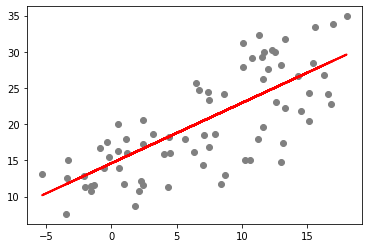

In [71]:
# (코드 3-27) 테스트 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [72]:
# (코드 3-28) 선형회귀 모델 평가
# MSE
print("평균제곱법(MSE)", metrics.mean_squared_error(y_test, y_pred))
# RMSE
print("루트 평균제곱법(RMSE)", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법(MSE) 21.94728280968831
루트 평균제곱법(RMSE) 4.68479271789994


## 3.2. 비지도 학습
* 레이블이 필요하지 않음
* 정답이 없는 상태에서 훈련시키는 방식
* 군집 (Clustering): 각 데이터의 유사성(거리)을 측정한 후 유사성이 높은(거리가 짧은) 데이터끼리 집단으로 분류하는 것
* 차원 축소 (Dimensionality Reduction): 차원을 나타내는 특성을 줄여서 데이터를 줄이는 방식

##### 3.2.1. K-means clustering (K-평균 군집화)

In [2]:
# K 평균 군집화
# 데이터를 입력 받아 소수의 그룹으로 묶는 알고리즘
# 중심점 선택 -> 클러스터 할당 -> 새로운 중심점 선택 -> 범위 확인

# (코드 3-29) 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# (코드 3-30) 연 지출 데이터 파일 불러오기
# 도매 유통업체의 고객 데이터
# Channel: 고객 채널 또는 소배 채널
# Region: 고객 지역
# Fresh ~ Delicassen: 각 부문의 연간 지출
data = pd.read_csv("./data/sales data.csv")
data.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788


In [5]:
# (코드 3-31) 연속형 데이터와 명목형 데이터로 분류
# 명목형 데이터
categorical_features = ["Channel", "Region"]

# 연속형 데이터
continuous_feature = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) #명목형 데이터는 판다스의 get_dummies() 메서드를 통해 숫자(0, 1)로 변환 가능
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [6]:
# (코드 3-32) 데이터 전처리 (스케일링)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

c:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


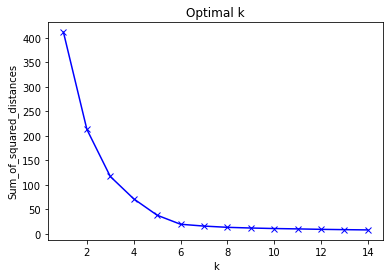

In [8]:
# (코드 3-33) K에 1~14까지 대입해보며 적당한 K값 추출
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed) # KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Optimal k")
plt.show()

# 결과 해석
# K=6부터 0에 가까워지고 있으므로, K=5가 적정하다고 판단

##### 3.2.2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise; 밀도 기반 군집 분석)

In [ ]:
# DBSCAN (밀도 기반 군집 분석)
# 클러스터의 숫자를 알지 못할 때 사용하면 유용
# 주어진 데이터에 이상치가 많이 포함되어 있을 때 사용하면 좋음 (이유: Noise에 영향 받지 않음)
# K-평균 군집화가 잘 처리하지 못하는 오목하거나 볼록한 부분을 처리하는 데 유용

##### 3.2.3. PCA (Principal Component Analysis; 주성분 분석)

In [9]:
# PCA 주성분 분석

# (코드 3-34) 라이브러리 호출
# DBSCAN + PCA
# 목표: 훈련 데이터를 정확하게 클러스터링 하는 것
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN # DBSCAN 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA # PCA 차원 축소

In [10]:
# (코드 3-35) 데이터 불러오기
X = pd.read_csv("./data/credit card.csv")

# 데이터에서 CUST_ID 칼럼 제거
X = X.drop("CUST_ID", axis=1)
X.fillna(method='ffill', inplace=True) # 결측 값을 앞의 값으로 채울 때 사용!!
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [11]:
# (코드 3-36) 데이터 전처리 및 차원 축소(2차원으로 축소)
scaler = StandardScaler()

# 평균=0, 표준편차=1이 되도록 스케일링
X_scaled = scaler.fit_transform(X)

# 데이터가 가우스 분포 따르도록 정규화
X_normalized = normalize(X_scaled)
# 넘파일 배열을 데이터 프레임(df)으로 변환
X_normalized = pd.DataFrame(X_normalized)

# 2차원으로 차원 축소 선언
pca = PCA(n_components=2)
# 차원 축소 적용
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["P1", "P2"]
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268882
3,-0.481656,-0.097613
4,-0.563512,-0.482505


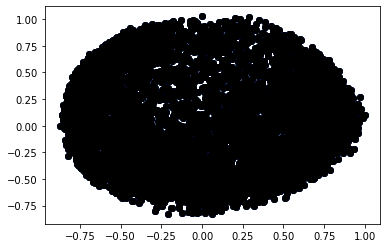

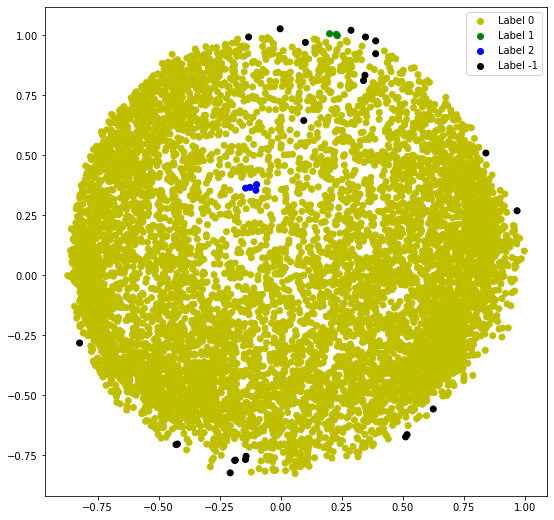

In [15]:
# (코드 3-37) DBSCAN 모델 생성 및 결과 시각화
# 모델 생성 및 훈련
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
# 각 데이터 포인터에 할당된 모든 클러스터 레이블의 넘파일 배열 저장
labels = db_default.labels_

# 출력 그래프의 색상을 위한 레이블 생성
colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# 각 데이터 포인트에 대한 색상 벡터 생성
cvec = [colours[label] for label in labels]
r = plt.scatter(X_principal["P1"], X_principal["P2"], color="y");
g = plt.scatter(X_principal["P1"], X_principal["P2"], color="g");
b = plt.scatter(X_principal["P1"], X_principal["P2"], color="b");
k = plt.scatter(X_principal["P1"], X_principal["P2"], color="k"); # plot의 범례(legend) 구성

plt.figure(figsize=(9,9))
# 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅(plotting)
plt.scatter(X_principal["P1"], X_principal["P2"], c=cvec)

# 범례 구축
plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

# 결과 >> DBSCAN 모델을 실행하여 시각화한 결과
# 결과를 보면 클러스터링에 대한 튜닝 필요
# DBSCAN에서 사용하는 min_samples(minPts)의 하이퍼파라미터를 3에서 50으로 변경한 후 시각화 부분 수정

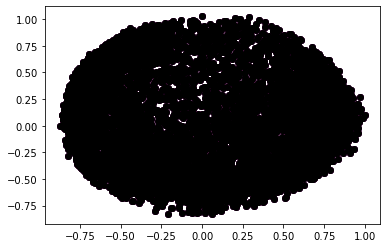

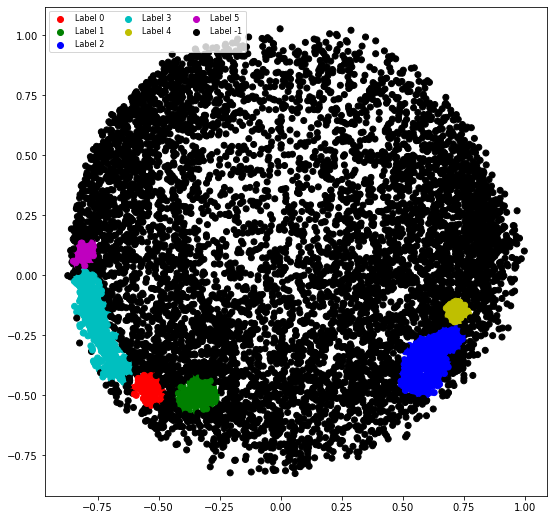

In [16]:
# (코드 3-38) 모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
# 각 데이터 포인터에 할당된 모든 클러스터 레이블의 넘파일 배열 저장
labels1 = db.labels_

# 출력 그래프의 색상을 위한 레이블 생성
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

# 각 데이터 포인트에 대한 색상 벡터 생성
cvec = [colours1[label] for label in labels1]
colors1 = ['r','g','b','c','y','m','k']

r = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[0]);
g = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[1]);
b = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[2]);
c = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[3]);
y = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[4]);
m = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[5]);
k = plt.scatter(X_principal["P1"], X_principal["P2"], marker='o', color=colors1[6]);


plt.figure(figsize=(9,9))
plt.scatter(X_principal["P1"], X_principal["P2"], c=cvec)

plt.legend((r,g,b,c,y,m,k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()

# 결과 해석
# 이전보다 군집이 잘 표현됨
# 즉, 하이퍼파라미터 영향에 따라 클러스터 결과(성능)가 달라지므로, 최적의 성능을 내려면 하이퍼파라미터를 이용한 '튜닝'이 중요!!!